In [12]:
# loading data
import matplotlib.pyplot as plt
from keras.datasets import mnist
import random
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers

(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
X_train[0].shape

(28, 28)

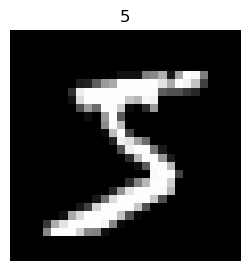

In [6]:
plt.figure(figsize=(3, 3))
plt.imshow(X_train[0], cmap="gray")
plt.title(y_train[0])
plt.axis(False);

In [7]:
# we need color_channels as well
X_train = X_train.reshape(X_train.shape + (1,))
X_test = X_test.reshape(X_test.shape + (1, ))

X_train.shape # (60000, 28, 28, 1)

(60000, 28, 28, 1)

In [8]:
# normalizing the data
X_train = X_train / 255.
X_test = X_test / 255.

In [11]:
# changing the data type
X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)

In [16]:
model = tf.keras.Sequential([
    layers.Conv2D(filters=10,
        kernel_size=3, 
        activation="relu", 
        input_shape=(28,  28,  1)),
    layers.Conv2D(12,  3, activation="relu"),
    layers.MaxPool2D(),
    layers.Conv2D(12,  3, activation="relu"),
    layers.Conv2D(12,  3, activation="relu"),
    layers.MaxPool2D(),
    layers.Flatten(),
    layers.Dense(10, activation="softmax")
])

In [17]:
# Check the summary of the model
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 10)        100       
                                                                 
 conv2d_5 (Conv2D)           (None, 24, 24, 12)        1092      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 12, 12, 12)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 10, 10, 12)        1308      
                                                                 
 conv2d_7 (Conv2D)           (None, 8, 8, 12)          1308      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 4, 4, 12)          0         
 g2D)                                                 

In [18]:
model.compile(loss="sparse_categorical_crossentropy", 
            optimizer=tf.keras.optimizers.Adam(),
            metrics=["accuracy"])

In [19]:
model.fit(X_train, y_train, epochs=10)

Epoch 1/10


1875/1875 [==============================] - 9s 4ms/step - loss: 0.4884 - accuracy: 0.8764
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0963 - accuracy: 0.9702
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0709 - accuracy: 0.9780
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0599 - accuracy: 0.9811
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0494 - accuracy: 0.9841
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0460 - accuracy: 0.9855
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0415 - accuracy: 0.9869
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0368 - accuracy: 0.9888
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0359 - accuracy: 0.9889
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0

In [20]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0410 - accuracy: 0.9865


[0.04096696525812149, 0.9865000247955322]